In [1]:
import os,sys
# code_dir = os.path.dirname(os.path.realpath(__file__))
# sys.path.append(f'{code_dir}/../../thirdparty/FoundationStereo')

code_dir = os.path.abspath('../../thirdparty/FoundationStereo')
sys.path.append(code_dir)
print(code_dir)

import matplotlib.pyplot as plt
import numpy as np
import imageio.v2 as imageio
import cv2
import torch

from omegaconf import OmegaConf
from core.utils.utils import InputPadder
from Utils import *
from core.foundation_stereo import *

c:\Users\86994\Desktop\camera_kit\thirdparty\FoundationStereo
Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
import sys
import os
import shutil

_module_path = os.path.abspath("../../")
print(_module_path)
sys.path.append(_module_path)

import cv2
import numpy as np
import matplotlib.pyplot as plt
from calibration_libs.ccalibration import CCameraCalibration
from calibration_libs.utils import get_chess_corners, get_chess_corners_world, img_to_world_by_dis, world_to_img_l

c:\Users\86994\Desktop\camera_kit


In [3]:
images_path =  os.path.abspath('../calibration/images_640x480')
# 标定板参数
chessSize=[11, 8] # col, row, 长边设置为col, 短边row , col作为x轴， row作为y轴
chessCellLen=20 # 单位 mm
#相机标定类
mycc = CCameraCalibration()  #初始化
mycc.set_calibration_images(images_path, 15, 480, 1280, size=chessSize, length=chessCellLen) #设置标定图像的路径和图片数量
mycc.stereo_calibration(True, reversal=False) #进行双目立体标定，得到内参矩阵、畸变系数、重映射矩阵map、重投影矩阵Q等
mycc.print_p()

['WIN_20251207_14_54_12_Pro.jpg', 'WIN_20251207_14_54_42_Pro.jpg', 'WIN_20251207_14_54_48_Pro.jpg', 'WIN_20251207_14_54_55_Pro.jpg', 'WIN_20251207_14_55_08_Pro.jpg', 'WIN_20251207_14_55_13_Pro.jpg', 'WIN_20251207_14_55_20_Pro.jpg', 'WIN_20251207_14_55_26_Pro.jpg', 'WIN_20251207_14_55_45_Pro.jpg', 'WIN_20251207_14_55_53_Pro.jpg', 'WIN_20251207_14_56_02_Pro.jpg', 'WIN_20251207_14_56_07_Pro.jpg', 'WIN_20251207_14_56_32_Pro.jpg', 'WIN_20251207_14_56_40_Pro.jpg', 'WIN_20251207_14_56_44_Pro.jpg', 'WIN_20251207_14_56_48_Pro.jpg', 'WIN_20251207_14_57_01_Pro.jpg', 'WIN_20251207_14_57_06_Pro.jpg', 'WIN_20251207_14_57_11_Pro.jpg', 'WIN_20251207_14_57_16_Pro.jpg']
you have calibrated !
左图对应相机的内参..................................
[[338.65445417   0.         294.63245868]
 [  0.         338.79315821 235.99560417]
 [  0.           0.           1.        ]]

右图对应相机的内参..................................
[[338.19616913   0.         279.11848074]
 [  0.         338.04469341 231.75555723]
 [  0.           

图像形状: (480, 1280, 3)


Text(0.5, 1.0, 'Remap')

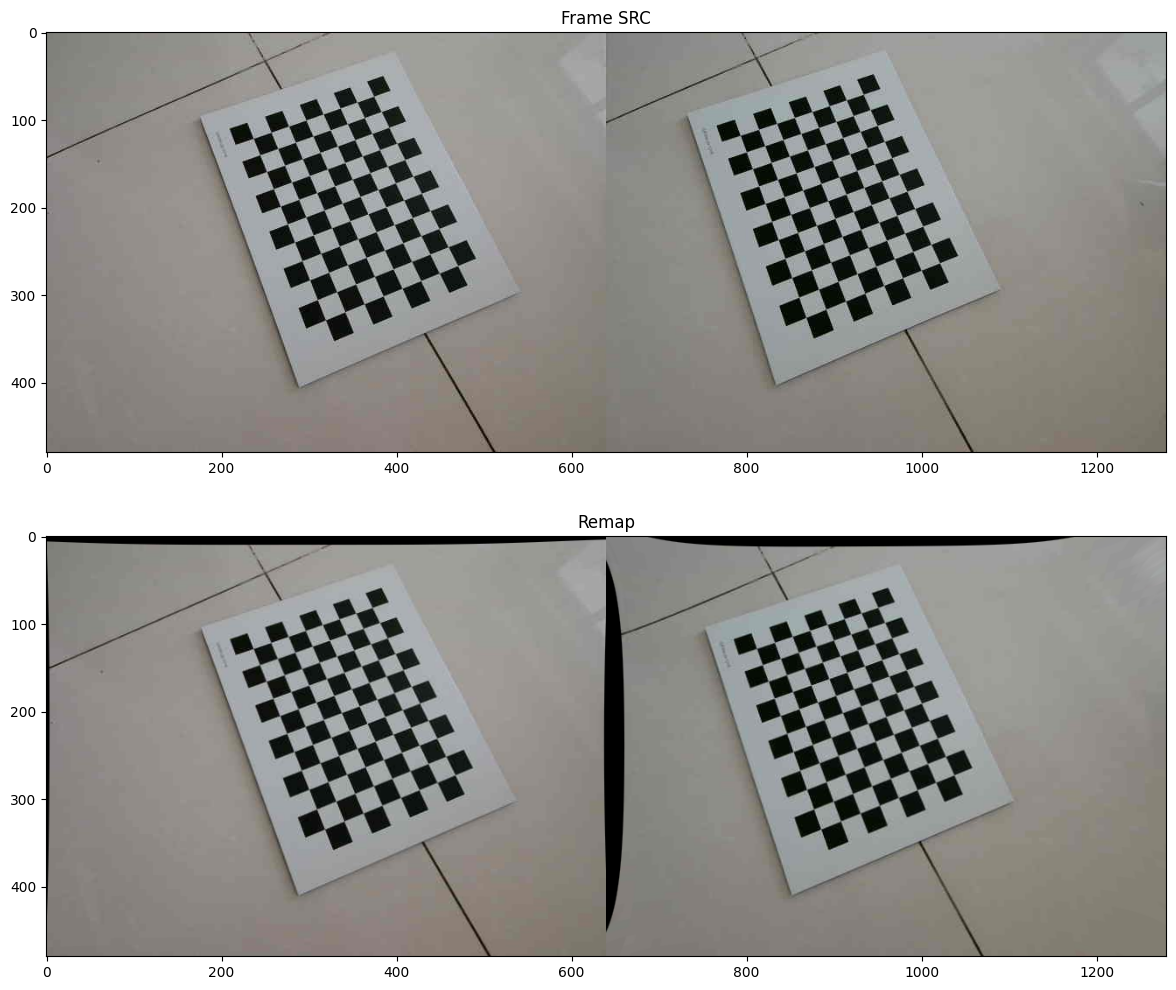

In [4]:
# 立体校正
img_src = cv2.imread('../calibration/images_640x480/WIN_20251207_14_54_12_Pro.jpg')
print("图像形状:", img_src.shape)
_height, _width, _c = img_src.shape
left_src = img_src[:, 0: _width//2] #拆分左右图像
right_src = img_src[:, _width//2:]

#立体校正
left_remap = cv2.remap(left_src, mycc._leftParameters["map1"], mycc._leftParameters["map2"], cv2.INTER_LINEAR)
right_remap = cv2.remap(right_src, mycc._rightParameters["map1"], mycc._rightParameters["map2"], cv2.INTER_LINEAR)
img_remap =  cv2.hconcat([left_remap, right_remap]) #合并校正后图像

plt.figure(figsize=(16,12))
plt.subplot(2, 1, 1)
plt.imshow(cv2.cvtColor(img_src, cv2.COLOR_BGR2RGB))
plt.title("Frame SRC")   # 左图标题

plt.subplot(2, 1, 2)
plt.imshow(cv2.cvtColor(img_remap, cv2.COLOR_BGR2RGB))
plt.title("Remap")   # 左图标题

In [5]:
#  parser.add_argument('--left_file', default=f'{code_dir}/../assets/left.png', type=str)
#   parser.add_argument('--right_file', default=f'{code_dir}/../assets/right.png', type=str)
#   parser.add_argument('--intrinsic_file', default=f'{code_dir}/K.txt', type=str, help='camera intrinsic matrix and baseline file')
#   parser.add_argument('--ckpt_dir', default=f'{code_dir}/../pretrained_models/23-51-11/model_best_bp2.pth', type=str, help='pretrained model path')
#   parser.add_argument('--out_dir', default=f'{code_dir}/../output/', type=str, help='the directory to save results')
#   parser.add_argument('--scale', default=1, type=float, help='downsize the image by scale, must be <=1')
#   parser.add_argument('--hiera', default=0, type=int, help='hierarchical inference (only needed for high-resolution images (>1K))')
#   parser.add_argument('--z_far', default=10, type=float, help='max depth to clip in point cloud')
#   parser.add_argument('--valid_iters', type=int, default=32, help='number of flow-field updates during forward pass')
#   parser.add_argument('--get_pc', type=int, default=1, help='save point cloud output')
#   parser.add_argument('--remove_invisible', default=1, type=int, help='remove non-overlapping observations between left and right images from point cloud, so the remaining points are more reliable')
#   parser.add_argument('--denoise_cloud', type=int, default=1, help='whether to denoise the point cloud')
#   parser.add_argument('--denoise_nb_points', type=int, default=30, help='number of points to consider for radius outlier removal')
#   parser.add_argument('--denoise_radius', type=float, default=0.03, help='radius to use for outlier removal')
#   args = parser.parse_args()

In [6]:
out_dir = f'./test_outputs/'
os.makedirs(out_dir, exist_ok=True)

In [7]:
set_logging_format()
set_seed(0)
torch.autograd.set_grad_enabled(False)

In [8]:
ckpt_dir = r'C:\Users\86994\Desktop\pretrained_models\23-51-11\model_best_bp2.pth'
cfg = OmegaConf.load(f'{os.path.dirname(ckpt_dir)}/cfg.yaml')
if 'vit_size' not in cfg:
    cfg['vit_size'] = 'vitl'

print(f"cfg:\n{cfg}")
print(f"Using pretrained model from {ckpt_dir}")

cfg:
{'corr_implementation': 'reg', 'corr_levels': 2, 'corr_radius': 4, 'finetune_ckpt_name': 'model_best_bp2.pth', 'finetune_from': None, 'hidden_dims': [128, 128, 128], 'img_gamma': None, 'inference_tile': 0, 'low_memory': 0, 'max_disp': 416, 'max_val_sample': None, 'mixed_precision': True, 'n_downsample': 2, 'n_gru_layers': 3, 'notes': '', 'num_steps': 200000, 'num_worker': 8, 'slow_fast_gru': False, 'tags_more': [], 'tile_min_overlap': [16, 16], 'tile_wtype': 'gaussian', 'time_limit': 14400, 'train_iters': 22, 'val_interval': 1, 'valid_iters': 32, 'wdecay': 0, 'world_size': 32, 'vit_size': 'vitl'}
Using pretrained model from C:\Users\86994\Desktop\pretrained_models\23-51-11\model_best_bp2.pth


In [10]:
model = FoundationStereo(cfg)
ckpt = torch.load(ckpt_dir, map_location=torch.device('cpu'))
print(f"ckpt global_step:{ckpt['global_step']}, epoch:{ckpt['epoch']}")
model.load_state_dict(ckpt['model'])

# model.cpu()
model.eval()

Loading pretrained weights from Hugging Face hub (timm/edgenext_small.usi_in1k)
HTTP Request: HEAD https://huggingface.co/timm/edgenext_small.usi_in1k/resolve/main/model.safetensors "HTTP/1.1 302 Found"
[timm/edgenext_small.usi_in1k] Safe alternative available for 'pytorch_model.bin' (as 'model.safetensors'). Loading weights using safetensors.
Using cache found in C:\Users\86994/.cache\torch\hub\facebookresearch_dinov2_main
using MLP layer as FFN
C:\Users\86994\AppData\Local\Temp\ipykernel_3952\2052847061.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed dur

ckpt global_step:200000, epoch:40


FoundationStereo(
  (cnet): ContextNetDino(
    (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (relu1): ReLU(inplace=True)
    (layer1): Sequential(
      (0): ResidualBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (relu): ReLU(inplace=True)
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (norm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): ResidualBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (relu): ReLU(inplace=True)
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, 

In [11]:


img0 = cv2.cvtColor(left_remap, cv2.COLOR_BGR2RGB)
img1 = cv2.cvtColor(right_remap, cv2.COLOR_BGR2RGB)

H,W = img0.shape[:2]
img0_ori = img0.copy()
print(f"img0: {img0.shape}")

img0 = torch.as_tensor(img0).float()[None].permute(0,3,1,2)
img1 = torch.as_tensor(img1).float()[None].permute(0,3,1,2)
padder = InputPadder(img0.shape, divis_by=32, force_square=False)
img0, img1 = padder.pad(img0, img1)

print("img0 tensor shape: ", img0.shape)
print("img1 tensor shape: ", img1.shape)


img0: (480, 640, 3)
img0 tensor shape:  torch.Size([1, 3, 480, 640])
img1 tensor shape:  torch.Size([1, 3, 480, 640])


In [12]:
print(img0.max())

tensor(212.)


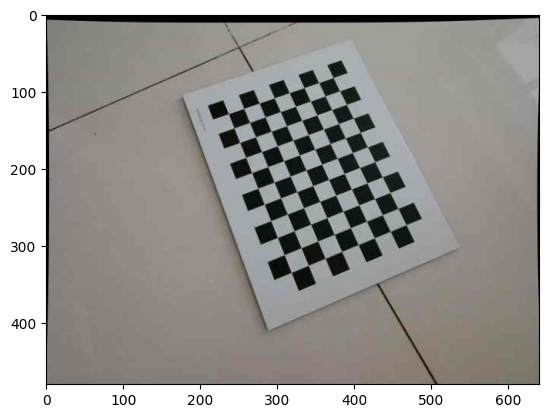

In [13]:
plt.imshow(img0_ori)

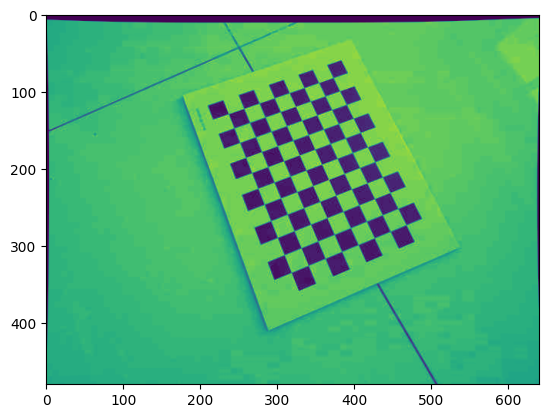

In [14]:
plt.imshow(img0[0][0])

In [15]:

# 'hierarchical inference (only needed for high-resolution images (>1K))'
hiera = 0

  # with torch.amp.autocast('cpu', enabled=False):
if not hiera:
  disp = model.forward(img0, img1, iters=cfg.valid_iters, test_mode=True)
else:
  disp = model.run_hierachical(img0, img1, iters=cfg.valid_iters, test_mode=True, small_ratio=0.5)
print(disp.shape)
disp = padder.unpad(disp.float())
print(disp.shape)
disp = disp.data.numpy().reshape(H,W)
print(disp.shape)
# np.save(f'{args.out_dir}/disp.npy', disp)

c:\Users\86994\Desktop\camera_kit\thirdparty\FoundationStereo\core\foundation_stereo.py:200: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=self.args.mixed_precision):
c:\Users\86994\miniforge3\envs\foundation_stereo\Lib\site-packages\torch\amp\autocast_mode.py:265: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
c:\Users\86994\Desktop\camera_kit\thirdparty\FoundationStereo\core\submodule.py:391: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
c:\Users\86994\Desktop\camera_kit\thirdparty\FoundationStereo\core\geometry.py:74: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
c:\Users\86994\Deskto

torch.Size([1, 1, 480, 640])
torch.Size([1, 1, 480, 640])
(480, 640)


c:\Users\86994\Desktop\camera_kit\thirdparty\FoundationStereo\core\foundation_stereo.py:185: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=self.args.mixed_precision):


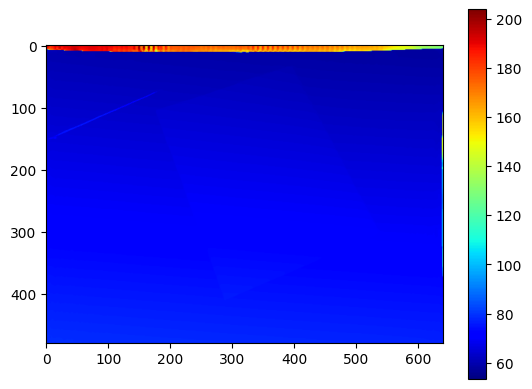

In [16]:
plt.imshow(disp, cmap='jet')
plt.colorbar()
plt.show()

In [17]:
np.save(os.path.join(out_dir, 'disp.npy'), disp)
vis = vis_disparity(disp)
vis = np.concatenate([img0_ori, vis], axis=1)
imageio.imwrite(os.path.join(out_dir, 'vis.png'), vis)
print(f"Output saved to {out_dir}")

Output saved to ./test_outputs/


In [18]:
# --remove_invisible', default=1, type=int, help='remove non-overlapping observations between left and right images from point cloud, so the remaining points are more reliable')
remove_invisible = 1
if remove_invisible:
    yy, xx = np.meshgrid(np.arange(disp.shape[0]), np.arange(disp.shape[1]), indexing='ij')
    us_right = xx-disp
    invalid = us_right<0
    disp[invalid] = np.inf

In [ ]:
# ('--get_pc', type=int, default=1, help='save point cloud output')
get_pc = 1

K = mycc._leftParameters['cameraMatrix']
baseline = 0.06 # 单位 m

In [20]:
print(K)

[[338.65445417   0.         294.63245868]
 [  0.         338.79315821 235.99560417]
 [  0.           0.           1.        ]]


In [22]:
depth = K[0,0]*baseline/disp # K[0][0] = f 焦距
np.save(f'{out_dir}/depth_meter.npy', depth)

In [23]:
xyz_map = depth2xyzmap(depth, K)
pcd = toOpen3dCloud(xyz_map.reshape(-1,3), img0_ori.reshape(-1,3))
z_far = 10
keep_mask = (np.asarray(pcd.points)[:,2]>0) & (np.asarray(pcd.points)[:,2]<=z_far)
keep_ids = np.arange(len(np.asarray(pcd.points)))[keep_mask]
pcd = pcd.select_by_index(keep_ids)
o3d.io.write_point_cloud(f'{out_dir}/cloud.ply', pcd)
print(f"PCL saved to {out_dir}")

PCL saved to ./test_outputs/


In [24]:
# denoise_nb_points', type=int, default=30, help='number of points to consider for radius outlier removal')
# denoise_cloud', type=int, default=1, help='whether to denoise the point cloud')
# denoise_radius', type=float, default=0.03, help='radius to use for outlier removal')

denoise_cloud = 1
denoise_nb_points = 30
denoise_radius = 0.03

if denoise_cloud:
    print("[Optional step] denoise point cloud...")
    cl, ind = pcd.remove_radius_outlier(nb_points=denoise_nb_points, radius=denoise_radius)
    inlier_cloud = pcd.select_by_index(ind)
    o3d.io.write_point_cloud(f'{out_dir}/cloud_denoise.ply', inlier_cloud)
    pcd = inlier_cloud

print("Visualizing point cloud. Press ESC to exit.")
vis = o3d.visualization.Visualizer()
vis.create_window()
vis.add_geometry(pcd)
vis.get_render_option().point_size = 1.0
vis.get_render_option().background_color = np.array([0.5, 0.5, 0.5])
vis.run()
vis.destroy_window()


[Optional step] denoise point cloud...
Visualizing point cloud. Press ESC to exit.
